## Koch Snowflake Fractal Billiard Table

### I. Koch Snowflake Generation

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
def q2(p1,p2): #bisector

    return ([(p1[0]+p2[0])/2,(p1[1]+p2[1])/2])

In [16]:
def q3(p1,p2): #trisector

    return ([(p1[0]+p2[0])/3,(p1[1]+p2[1])/3])

In [17]:
def kochmore(p1,p2,n):
    
    #input two point of a line [p1,p2], and depth of koch n
    #returns two points of line with length koched to depth n
    
    if n == 0:
        return [p1,p2]
    else:
        p3 = q3(p1,p2)
        p = kochmore(p1,p3,n-1)
    
    return p

In [18]:
def rotater(pn,po,an):  

    # inputs point on function pn, point of rotation po, and angle of rotation an
    # returns function rotated along po at angle an
    
    pt = np.empty(np.shape(pn))
    for i in range(len(pt[:,0])):
        pt[i,0] = (pn[i,0]-po[0])*np.cos(an) - (pn[i,1]-po[1])*np.sin(an) + po[0]
        pt[i,1] = (pn[i,0]-po[0])*np.sin(an) + (pn[i,1]-po[1])*np.cos(an) + po[1]
   
    return pt

In [19]:
def angles(n):
    
    #input depth of koch n
    #returns array of angles corresponding to each side
    
    z=[]
    if n==0:
        return []
    if n==1:
        z.extend( [1.0472,-2.0944,1.0472])
    else:
        for i in angles(n-1):
            c = angles(1)
            c.append(i)
            z.extend(c)
        z.extend(angles(1))

    return z

In [20]:
def power(n):
    
    #input depth of koch n
    #returns number of sides per side of base triangle
    
    if n==0:
        return 1
    else:
        return power(n-1)*4

In [39]:
def general(a,b,n):
    
    #two points of a line corresponding to side of a triangle a and b, and depth of koch n
    #retturns koch snowflake of depth (n)
    
    x = (kochmore(a,b,n))
    
    fin = [] + x
    y = []
    i = 1
    while i <= power(n) * 3:
        for k in angles(n) + [-2.0944]:
            x = np.array(x)
            if i % 2 == 0 or n == 0:
                y = (rotater (x,x[len(x) - 1],k))
            elif i % 2 == 1 :
                y = rotater (x,x[0],k)
                
            dx = abs(x[len(x) - 1,0] - y[0,0])
            dy = abs(x[len(x) - 1,1] - y[0,1])
            
            if y[0,0] > x[len(x)-1,0]:
                y[:,0] = np.subtract(y[:,0],dx)
            elif y[0,0] < x[len(x)-1,0]:
                y[:,0] = np.add(y[:,0],dx)
            
            if y[0,1] > x[len(x)-1,1]:
                y[:,1] = np.subtract(y[:,1],dy)
            elif y[0,1] < x[len(x)-1,1]:
                y[:,1] = np.add(y[:,1],dy)
        
            y = y.tolist()
            fin = fin + y
            i += 1

            x = y


    fin = np.array(fin)
    plt.plot(fin[:,0],fin[:,1])
    plt.savefig("Koch Snowflake n=" +str(n))
    plt.clf()
    return fin

### II. Particle path simulation in fractal

In [40]:
def billiards(fin,th0):
    x0,y0 = q2(fin[1],fin[3])
    th = np.arctan((fin[1][1]-fin[3][1])/(fin[1][0]-fin[3][0]))-th0
    bill = [[x0,y0]]

    for z in range (20):
        #print(z)
        h = True
        while h==True:
            x0 += np.cos(th)
            y0 += np.sin(th)
            #print(y0-functions[3][0](x0))
            for i in range(len(functions)-1):
                if (x0 < functions[i][2] and x0 >functions[i][3]) or (x0 > functions[i][2] and x0 <functions[i][3]):
                    if (abs(y0 - functions[i][0](x0)))<1:
                        #print((abs(y0 - functions[i][0](x0))))
                        bill.append([x0,y0])
                        h=False
                        break
        bth = (np.arctan(functions[i][1])-th)*2
        th += bth
        #print(th,np.pi/3)
    bill=np.array(bill)
    plt.plot(fin[:,0],fin[:,1])
    plt.plot(bill[:,0],bill[:,1])
    plt.savefig("pi6 n=" +str(n))

### Main Function

In [41]:
## points of side triangle
a = [0,0]
b = [10000,0]

In [49]:
## MAIN
n=1
fin=general(a,b,n)    

<Figure size 432x288 with 0 Axes>

th = -np.pi/3
bill = []
x0,y0 = q2(fin[0],fin[1])
for z in range (10):
    while True:
        x0 += np.cos(th)
        y0 += np.sin(th)
        #print(y0,functions[3][0](x0))
        if y0 == (functions[i][0](x0) for i in range(len(functions)-1)):
            bill.append([x0,y0])
            break
    th = np.arctan(functions[i][1])

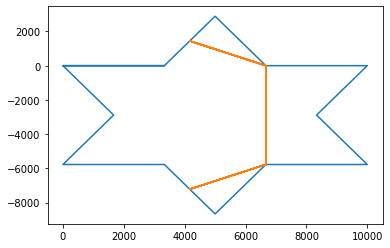

In [51]:
th0 = np.pi/2 #initial theta
billiards(fin,th0)